In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("/kaggle/input/app-store-dataset/AppleStore.csv")

In [3]:
df.head()

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,284882215,Facebook,389879808,USD,0.0,2974676,212,3.5,3.5,95,4+,Social Networking,37,1,29,1
1,389801252,Instagram,113954816,USD,0.0,2161558,1289,4.5,4.0,10.23,12+,Photo & Video,37,0,29,1
2,529479190,Clash of Clans,116476928,USD,0.0,2130805,579,4.5,4.5,9.24.12,9+,Games,38,5,18,1
3,420009108,Temple Run,65921024,USD,0.0,1724546,3842,4.5,4.0,1.6.2,9+,Games,40,5,1,1
4,284035177,Pandora - Music & Radio,130242560,USD,0.0,1126879,3594,4.0,4.5,8.4.1,12+,Music,37,4,1,1


In [4]:
df.describe()

,id,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
count,7.197000e+03,7.197000e+03,7197.000000,7.197000e+03,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000
mean,8.631310e+08,1.991345e+08,1.726218,1.289291e+04,460.373906,3.526956,3.253578,37.361817,3.707100,5.434903,0.993053
std,2.712368e+08,3.592069e+08,5.833006,7.573941e+04,3920.455183,1.517948,1.809363,3.737715,1.986005,7.919593,0.083066
min,2.816565e+08,5.898240e+05,0.000000,0.000000e+00,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000
25%,6.000937e+08,4.692275e+07,0.000000,2.800000e+01,1.000000,3.500000,2.500000,37.000000,3.000000,1.000000,1.000000
50%,9.781482e+08,9.715302e+07,0.000000,3.000000e+02,23.000000,4.000000,4.000000,37.000000,5.000000,1.000000,1.000000
75%,1.082310e+09,1.819249e+08,1.990000,2.793000e+03,140.000000,4.500000,4.500000,38.000000,5.000000,8.000000,1.000000
max,1.188376e+09,4.025970e+09,299.990000,2.974676e+06,177050.000000,5.000000,5.000000,47.000000,5.000000,75.000000,1.000000


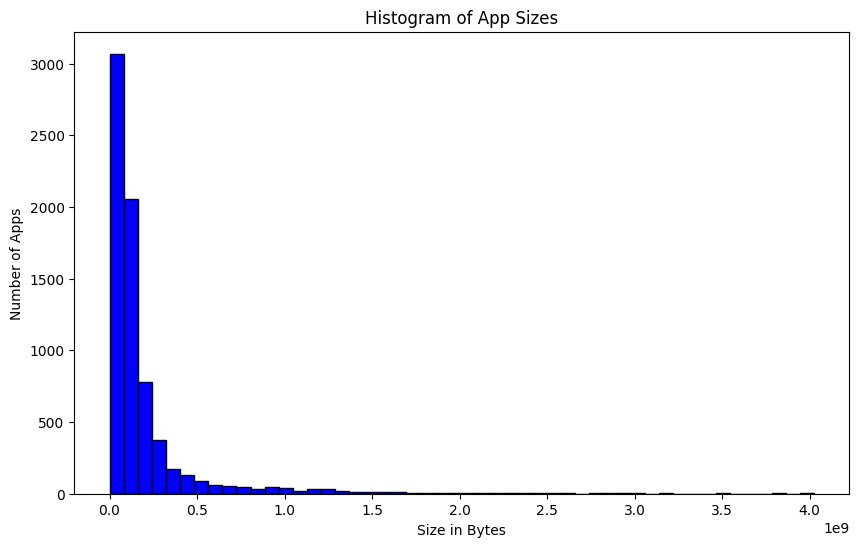

In [5]:
plt.figure(figsize=(10, 6))
plt.hist(df['size_bytes'], bins=50, color='blue', edgecolor='black')
plt.title('Histogram of App Sizes')
plt.xlabel('Size in Bytes')
plt.ylabel('Number of Apps')
plt.show()

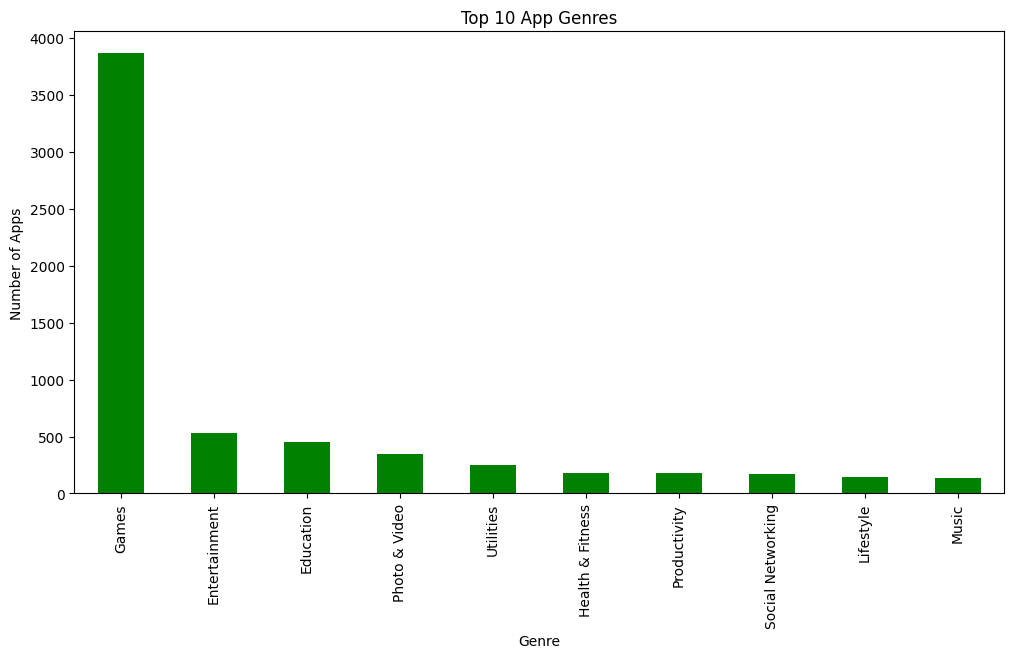

In [6]:
top_genres = df['prime_genre'].value_counts().head(10)
top_genres.plot(kind='bar', figsize=(12, 6), color='green')
plt.title('Top 10 App Genres')
plt.xlabel('Genre')
plt.ylabel('Number of Apps')
plt.show()

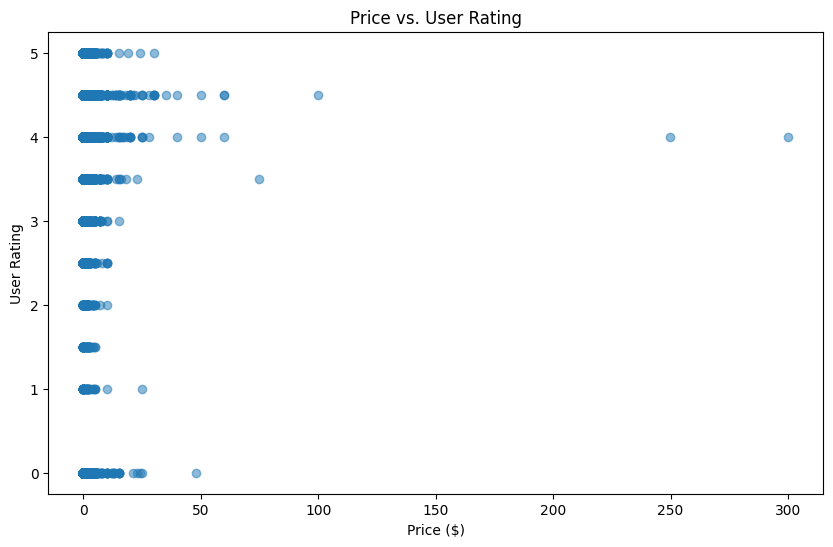

In [7]:
plt.figure(figsize=(10, 6))
plt.scatter(df['price'], df['user_rating'], alpha=0.5)
plt.title('Price vs. User Rating')
plt.xlabel('Price ($)')
plt.ylabel('User Rating')
plt.show()

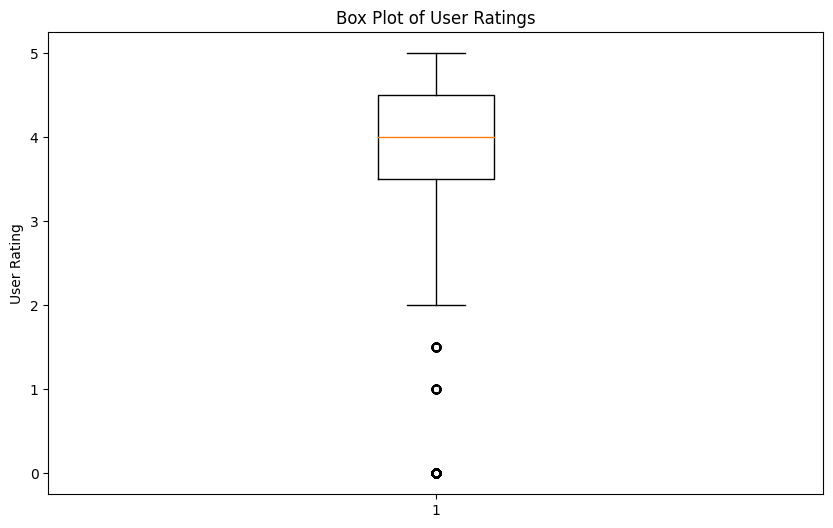

In [8]:
plt.figure(figsize=(10, 6))
plt.boxplot(df['user_rating'])
plt.title('Box Plot of User Ratings')
plt.ylabel('User Rating')
plt.show()

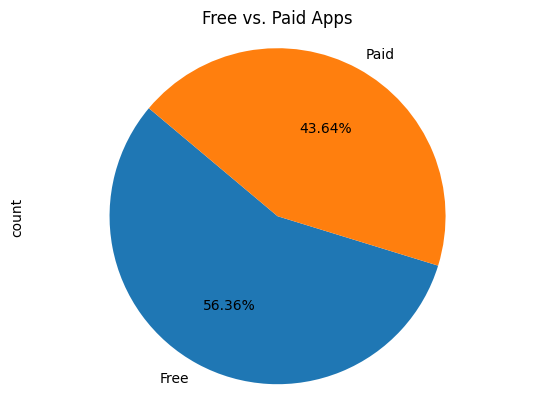

In [9]:
free_vs_paid = df['price'].apply(lambda x: 'Free' if x == 0 else 'Paid').value_counts()
free_vs_paid.plot(kind='pie', autopct='%1.2f%%', startangle=140)
plt.axis('equal')
plt.title('Free vs. Paid Apps')
plt.show()

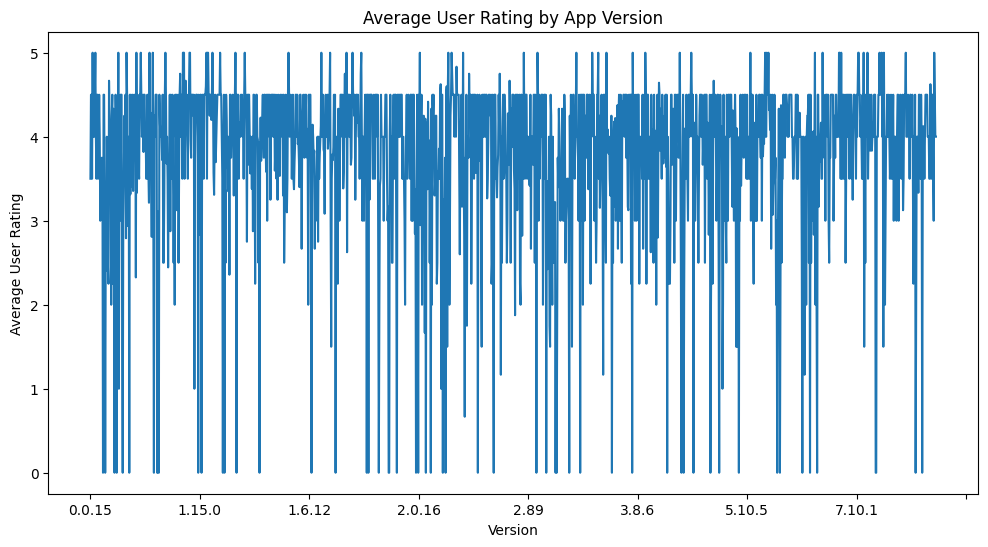

In [10]:
avg_rating_by_ver = df.groupby('ver')['user_rating'].mean()
avg_rating_by_ver.plot(kind='line', figsize=(12, 6))
plt.title('Average User Rating by App Version')
plt.xlabel('Version')
plt.ylabel('Average User Rating')
plt.show()

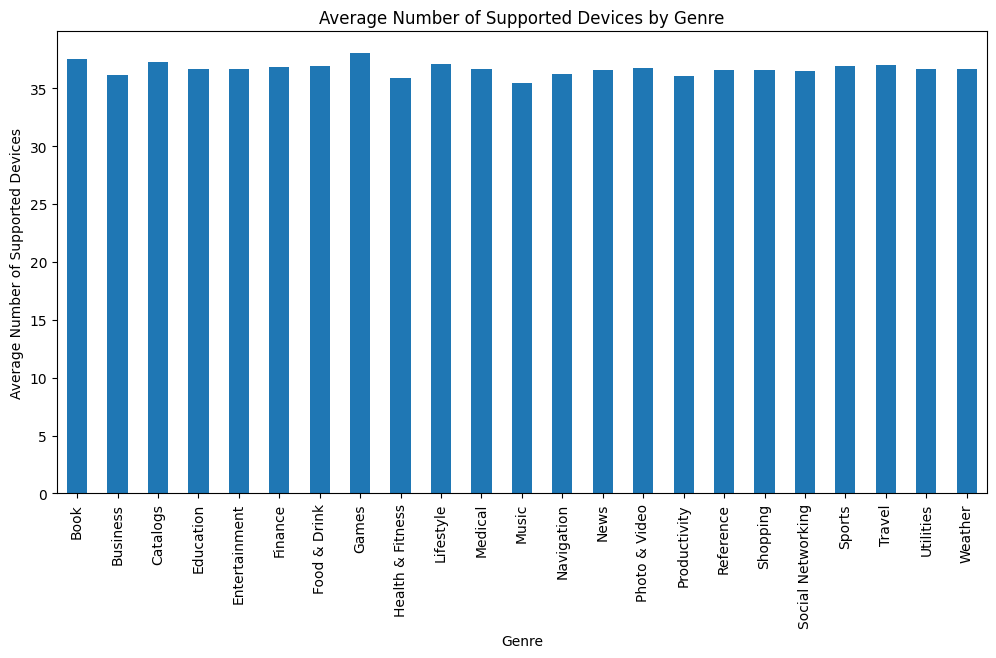

In [11]:
device_support = df.groupby('prime_genre')['sup_devices.num'].mean()
device_support.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Average Number of Supported Devices by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Number of Supported Devices')
plt.show()

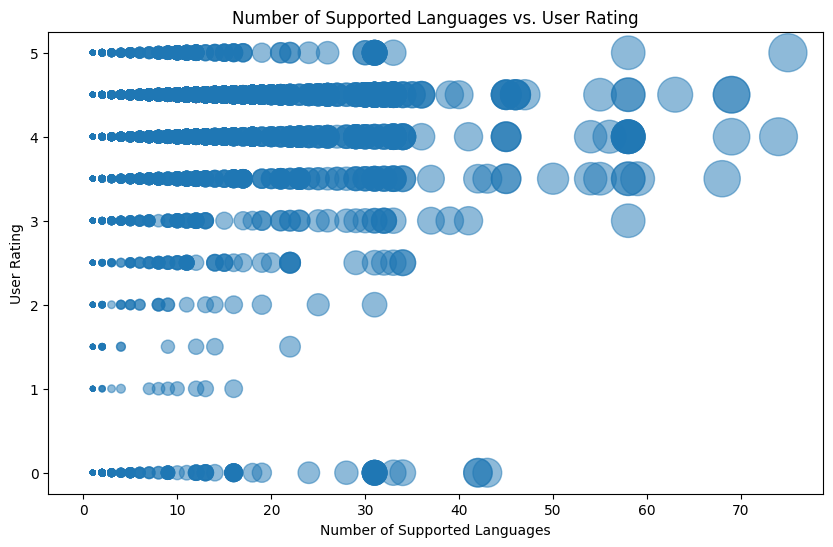

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(df['lang.num'], df['user_rating'], s=df['lang.num']*10, alpha=0.5)
plt.title('Number of Supported Languages vs. User Rating')
plt.xlabel('Number of Supported Languages')
plt.ylabel('User Rating')
plt.show()

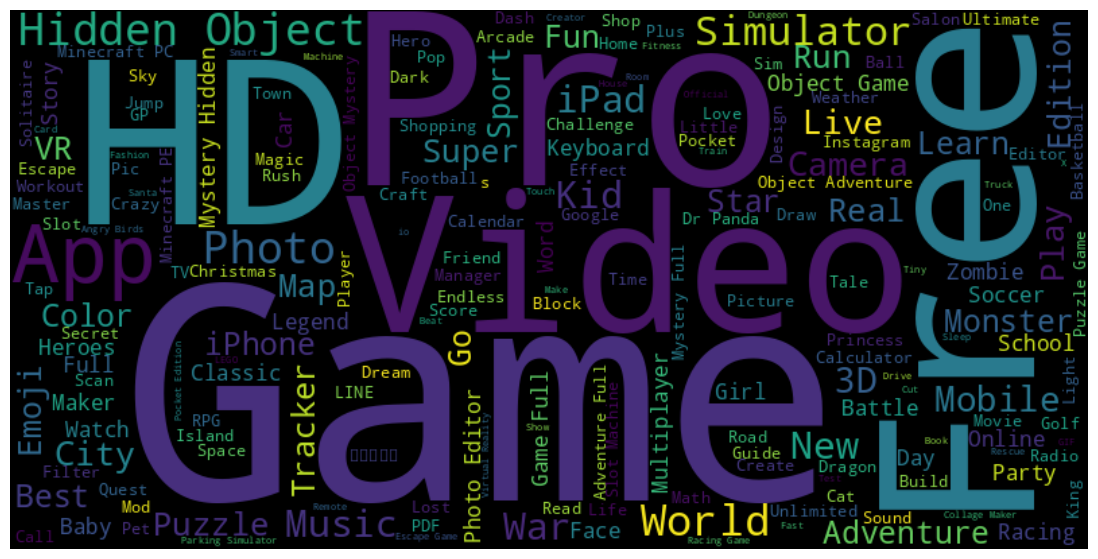

In [13]:
from wordcloud import WordCloud

text = ' '.join(df['track_name'])
wordcloud = WordCloud(width=800, height=400).generate(text)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()